<a href="https://colab.research.google.com/github/andremarinho17/data_analytics_projects_en/blob/main/Google%20Advanced%20Data%20Analytics%20Capstone/Google_Advanced_Analytics_Professional_Certificate_Capstone_Salifort_Motors_project_lab_Andr%C3%A9_Marinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone project: Providing data-driven suggestions for HR - Turnover prediction**

<p align="center"><img src="https://media.licdn.com/dms/image/v2/D5612AQEQ8shJty8jng/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1691630286194?e=2147483647&v=beta&t=SgYAlHaCpC1IGGy3_JI9x8KkrSoXlOzeSobkN72cgTI" >


**Author: André Marinho**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


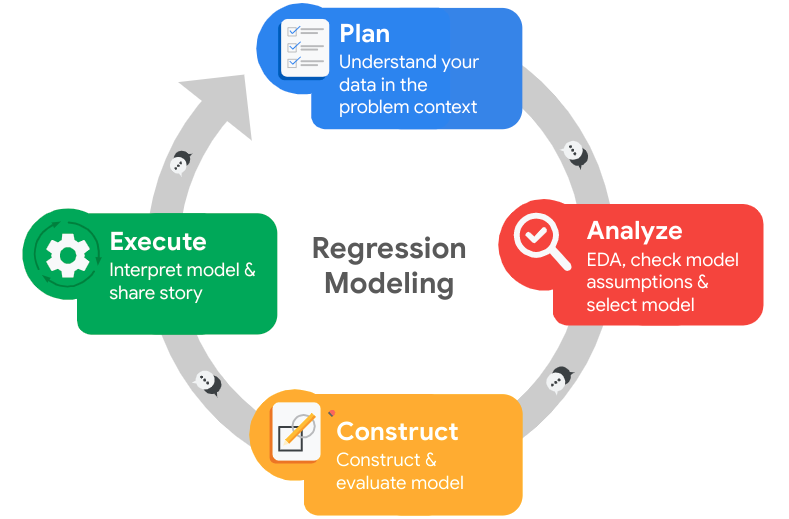

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).


**Dictionary:**
- `satisfaction_level`: Employee-reported job satisfaction level [0–1]
- `last_evaluation`: Score of employee's last performance review [0–1]
- `number_project`: Number of projects employee contributes to
- `average_monthly_hours`: Average number of hours employee worked per month
- `time_spend_company`: How long the employee has been with the company (years)
- `Work_accident`: Whether or not the employee experienced an accident while at work
- `left`: Whether or not the employee left the company
- `promotion_last_5years`: Whether or not the employee was promoted in the last 5 years
- `Department`: The employee's department
- `salary`: The employee's salary (U.S. dollars)


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [ ]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from scipy import stats

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
### YOUR CODE HERE ###
df = pd.read_csv("/content/HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [ ]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


The data is composed mainly by numerical attributes, with only two categorical ones: `satisfaction_level` and `last_evaluation`.

### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


The dataset contains 14,999 records and provides comprehensive information regarding employee job satisfaction, performance, and workplace characteristics. The numeric columns, such as `satisfaction_level` and `last_evaluation`, have a range between 0 and 1, indicating normalized metrics. On average, employees report a satisfaction level of 0.61, with a standard deviation of 0.25. The `number_project` variable suggests that most employees handle approximately four projects, with the range spanning from 2 to 7. Monthly working hours average 201 but vary significantly, indicating possible workload imbalances. The `time_spend_company` metric shows that employees typically stay for three years, with some potential outliers reaching up to 10 years. Interestingly, the binary variable `promotion_last_5years` reveals that only 2% of employees received a promotion, and 14% experienced a workplace accident.

The categorical variables, `Department` and `salary`, give insight into workforce distribution and compensation levels. The most frequent department is "sales," accounting for a significant portion of the workforce, while salary distribution is split into three categories: low, medium, and high. Nearly half the employees fall into the "low" salary bracket, which may correlate with job satisfaction and retention.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns as needed
df = df.rename(columns={'Work_accident': 'work_accident',
                   'Department': 'department'})

# Display all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [ ]:
# Check for missing values
df.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


As can be seen, there is no missing values.

### Check duplicates

Check for any duplicate entries in the data.

In [ ]:
# Check for duplicates
df.duplicated().sum()

3008

There are 3008 duplicated rows in the dataset, which represent almost 20% of the data.

In [ ]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df[~df.duplicated()]

# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

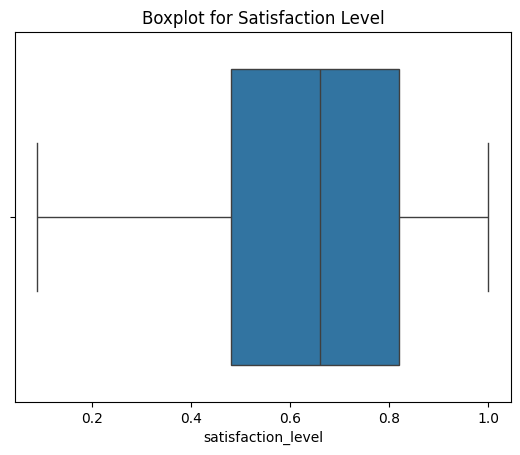

In [ ]:
sns.boxplot(x=df['satisfaction_level'])
plt.title('Boxplot for Satisfaction Level')
plt.show()

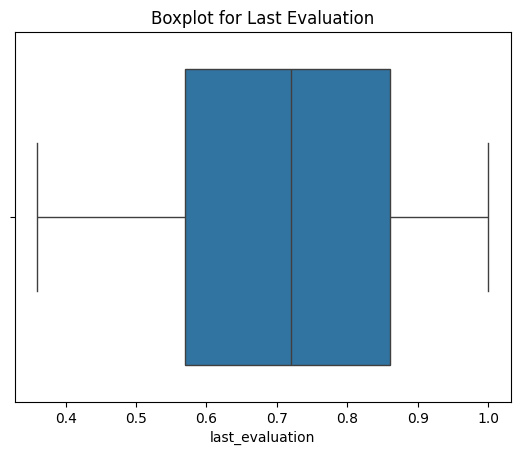

In [ ]:
sns.boxplot(x=df['last_evaluation'])
plt.title('Boxplot for Last Evaluation')
plt.show()

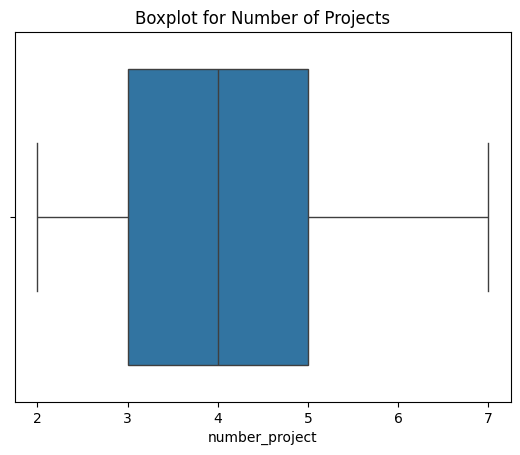

In [ ]:
sns.boxplot(x=df['number_project'])
plt.title('Boxplot for Number of Projects')
plt.show()

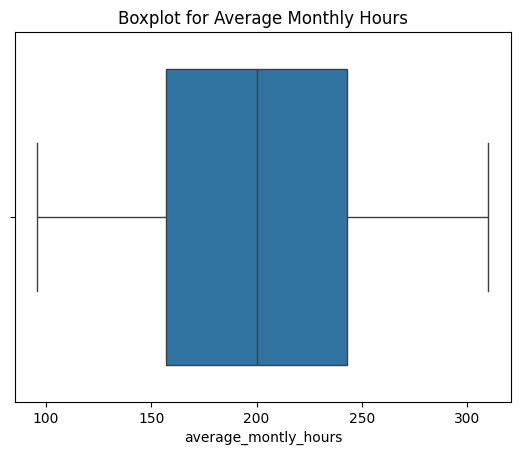

In [ ]:
sns.boxplot(x=df['average_montly_hours'])
plt.title('Boxplot for Average Monthly Hours')
plt.show()

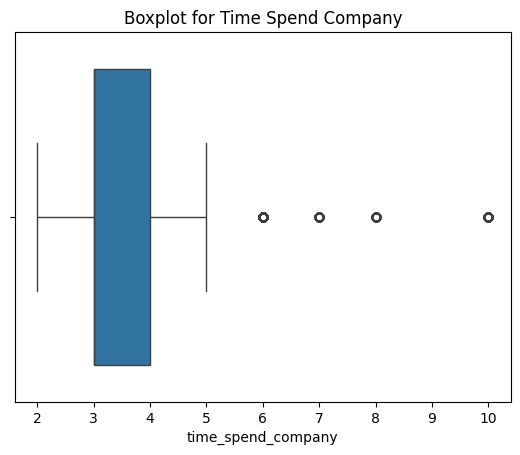

In [ ]:
sns.boxplot(x=df['time_spend_company'])
plt.title('Boxplot for Time Spend Company')
plt.show()

As can be seen, only the `time_spend_company` is composed of outliers. However, these outliers can be important in deciding whether or not an employee will leave the company, so they will be kept.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [ ]:
# Get numbers of people who left vs. stayed
df['left'].value_counts()

,count
left,
0,10000
1,1991


In [ ]:
# Get percentages of people who left vs. stayed
df['left'].value_counts() / df.shape[0] * 100

,count
left,
0,83.39588
1,16.60412


The variable `left` indicates that almost 17% of employees have exited the company, providing a moderately imbalanced dataset for predicting employee attrition.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

First, the distribution of some variables will be analyzed in order to understand some patterns.

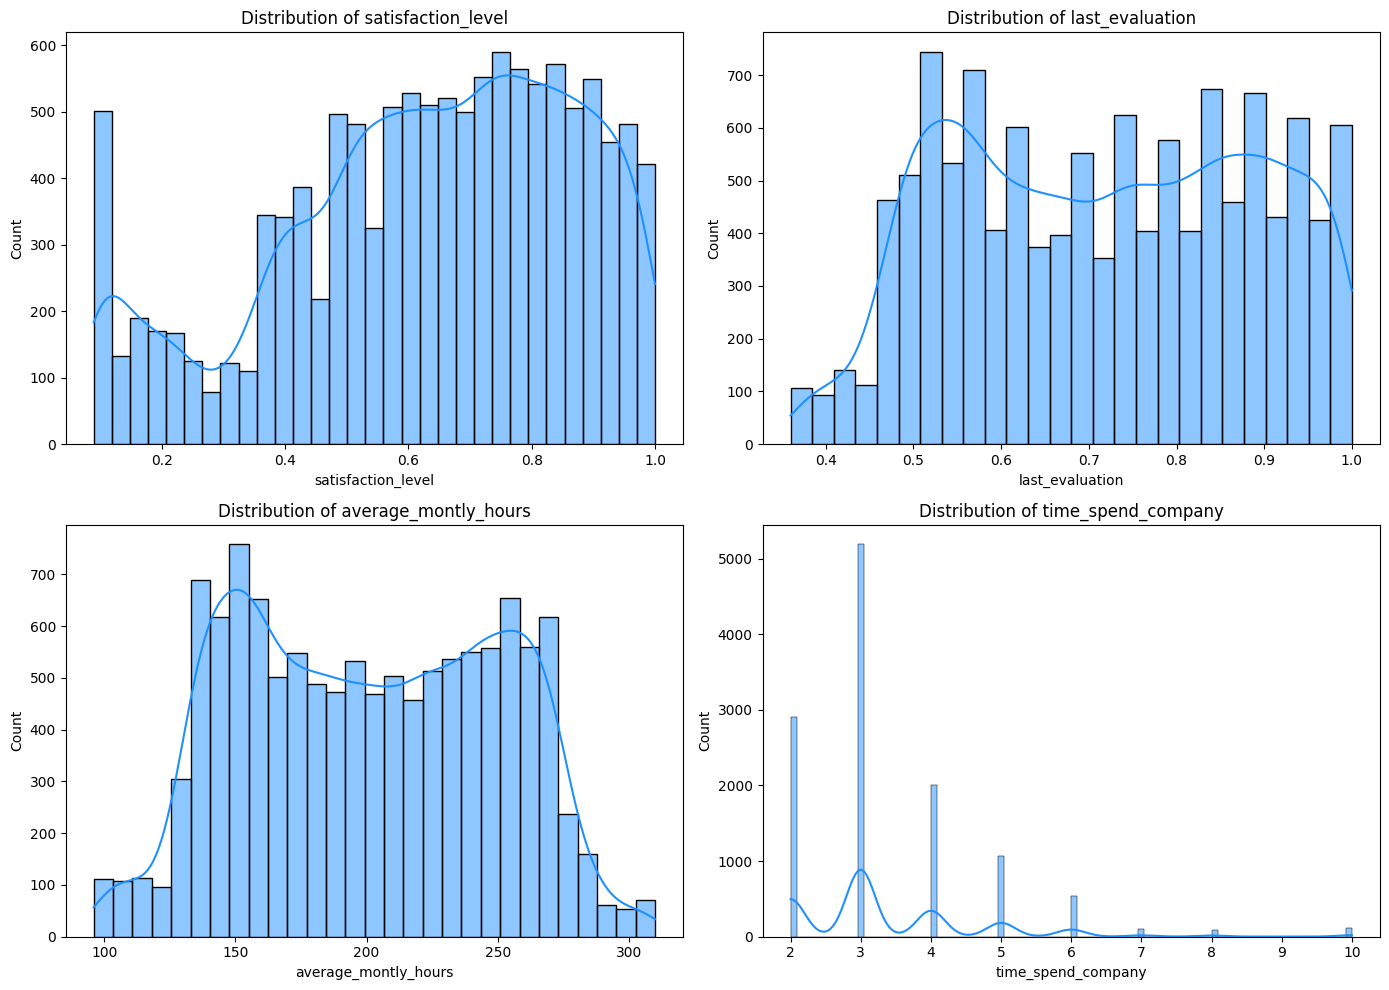

In [ ]:
# Analyzing the distribution of some variables
num_cols = ["satisfaction_level", "last_evaluation", "average_montly_hours", "time_spend_company"]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i // 2, i % 2], color="dodgerblue")
    axes[i // 2, i % 2].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

The upper left graph illustrates the distribution of satisfaction levels, revealing that most employees report moderate levels of satisfaction, with fewer indicating very low or very high satisfaction. This suggests that a significant portion of the workforce may be at risk of leaving if their satisfaction does not improve, highlighting the need for HR to actively monitor and address employee engagement.

The upper right graph, showing the distribution of last evaluation scores, indicates a relatively even spread, yet there seems to be a noticeable dip in scores below the average, which may imply that employees with lower performance ratings could be more likely to consider leaving.

In the lower left graph, the distribution of average monthly hours worked suggests that employees tend to work around 150 to 250 hours monthly, with a small number working significantly more. This could indicate that excessive working hours might be a stress factor leading to increased attrition.

Lastly, the lower right graph depicts the distribution of time spent at the company, with a concentration of employees having been with the organization for 3 to 6 years, suggesting that early career employees might feel less committed.

Next, the correlation between the variables will be analyzed in order to identify significant relationships that can provide insights into employee behavior and engagement.

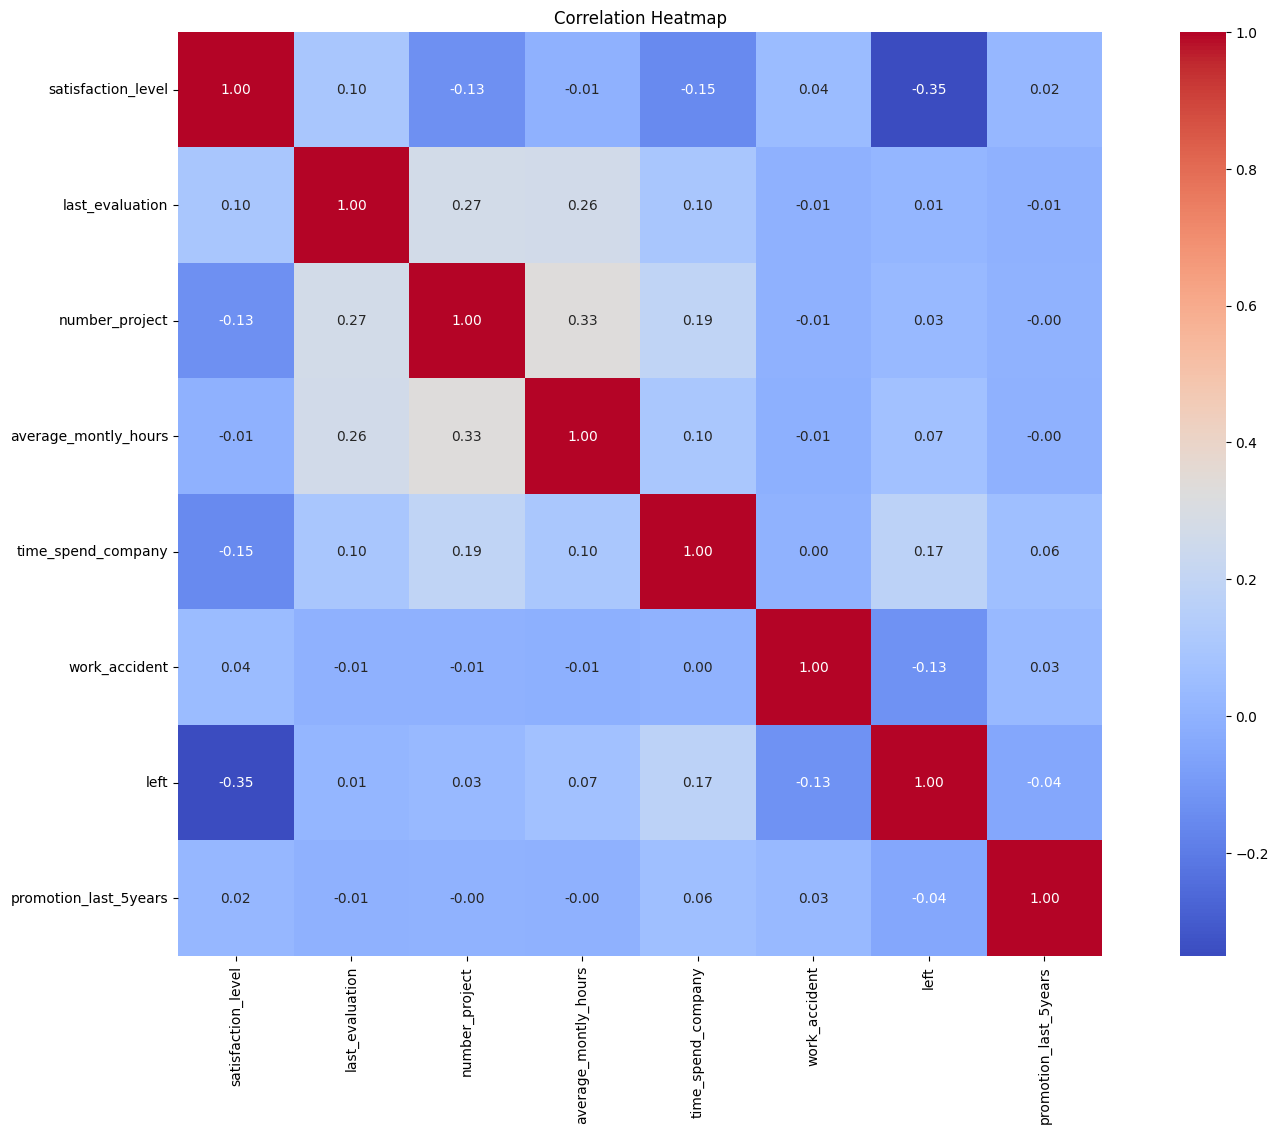

In [ ]:
# Correlation heatmap
plt.figure(figsize=(20, 12))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap")
plt.show()

Notably, there is a strong negative correlation of -0.35 between satisfaction level and the likelihood of an employee leaving the company, indicating that lower job satisfaction is strongly associated with higher turnover rates. Additionally, the correlation of 0.33 between average monthly hours and number of projects suggests that employees who work on more projects tend to log more hours, which could imply that workload management might need attention to prevent burnout and potential turnover. The positive correlation of 0.17 between time spent at the company and leaving indicates that employees with longer tenures are slightly more likely to leave, potentially pointing to stagnation or a lack of growth opportunities for those who have been with the organization for extended periods.

Moreover, the correlation of 0.27 between last evaluation and number of projects suggests that employees who take on more projects tend to receive better performance evaluations, highlighting the potential for increased responsibility to be linked with recognition. Additionally, a moderate correlation of 0.26 between average monthly hours and last evaluation implies that employees who work longer hours might also be perceived as performing better, although this raises concerns about balancing workload and employee well-being. Finally, the positive correlation of 0.19 between number of projects and time spent at the company indicates that longer-tenured employees may be assigned to more projects, which could lead to increased engagement but also the risk of burnout if not managed carefully.

Building on the insights gained from the correlation heatmap, the impact of various employee attributes on turnover will be explored by examining segmented boxplots based on the "left" variable, which will provide a clearer visualization of how these characteristics differ between employees who stayed and those who departed.

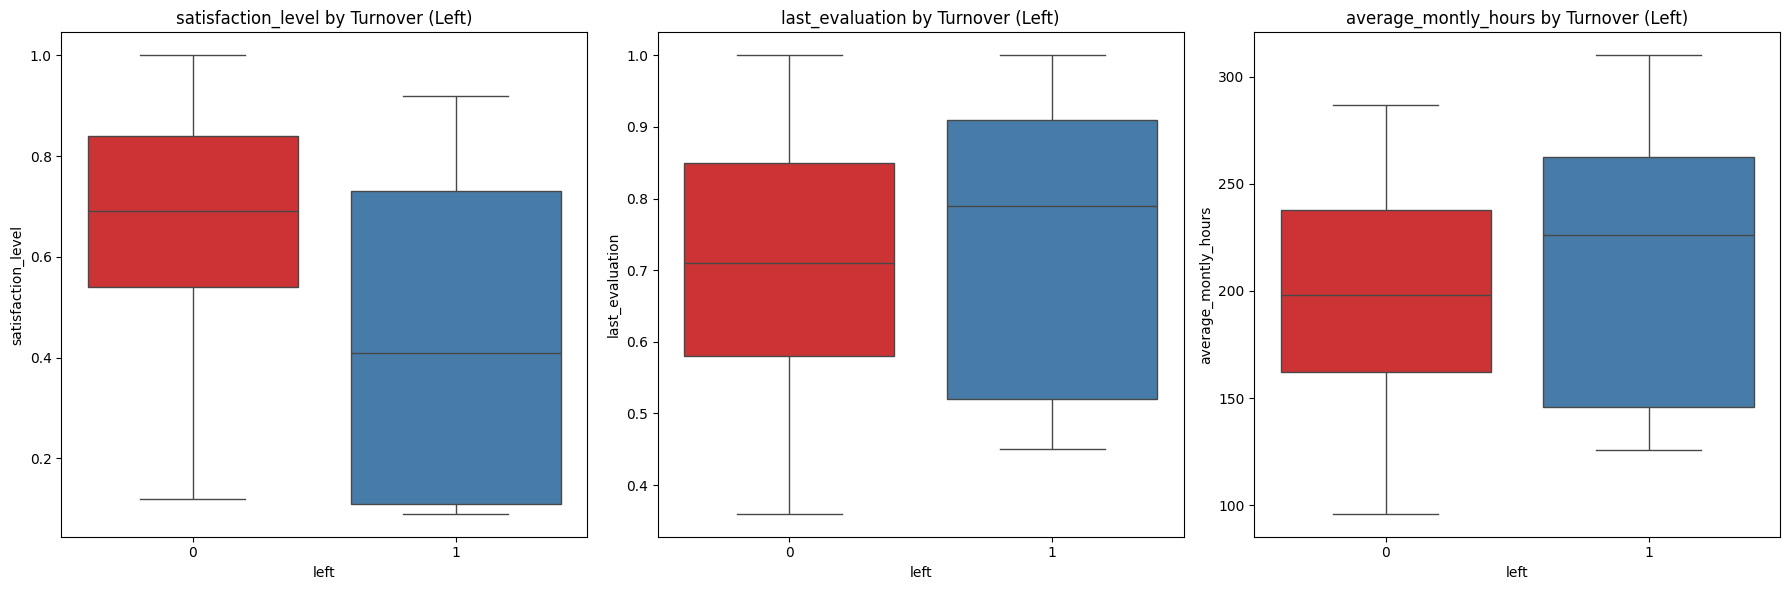

In [ ]:
# Segmented boxplots by "left"
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(["satisfaction_level", "last_evaluation", "average_montly_hours"]):
    sns.boxplot(x="left", y=col, data=df, ax=axes[i], palette="Set1")
    axes[i].set_title(f"{col} by Turnover (Left)")
plt.tight_layout()
plt.show()

In the first boxplot, which illustrates satisfaction levels, it is evident that the median satisfaction level for employees who left is significantly lower than that of those who stayed, with a wider interquartile range for the leavers, indicating greater variability in dissatisfaction among those who departed. This reinforces the idea that low job satisfaction is a critical factor influencing turnover.

The second boxplot, showing last evaluation scores, similarly reveals that employees who left tend to have lower median scores compared to those who remained. The range of scores for leavers is also broader, suggesting that while some employees with low evaluations left, others with slightly better scores still chose to depart, indicating that performance feedback alone may not be enough to retain employees.

Finally, the third boxplot, which depicts average monthly hours worked, indicates that employees who left tend to work slightly fewer hours on average than those who stayed, although the difference is less pronounced compared to the other metrics. This may suggest that employees who are disengaged or dissatisfied with their jobs might reduce their working hours as a form of withdrawal behavior.

With a clearer understanding of how turnover rates vary by department and salary categories, the analysis will now shift to exploring employee interactions, specifically examining the relationships between satisfaction levels and last evaluation scores, as well as average monthly hours worked and satisfaction levels.

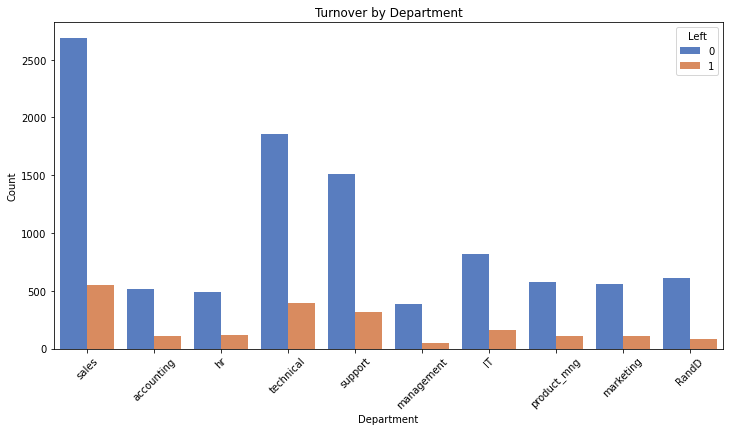

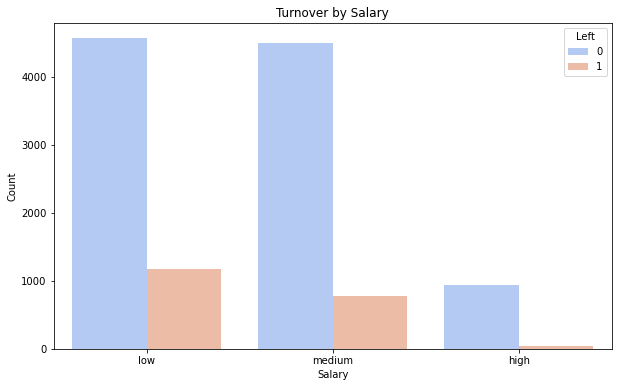

In [ ]:
# Bar chart for department and salary
plt.figure(figsize=(12, 6))
sns.countplot(x="department", hue="left", data=df, palette="muted")
plt.title("Turnover by Department")
plt.xticks(rotation=45)
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(title="Left", loc="upper right")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x="salary", hue="left", data=df, palette="coolwarm")
plt.title("Turnover by Salary")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.legend(title="Left", loc="upper right")
plt.show()

When it comes to the turnover by department, the sales department exhibits the highest turnover rate, with a substantially larger number of employees having left compared to the other departments. In contrast, departments such as IT and marketing show much lower turnover rates, with significantly more employees staying with the company. This disparity suggests that the sales department may be facing unique challenges related to job satisfaction, workload, or management practices that warrant further investigation. Additionally, the remaining departments display varying levels of turnover, indicating that employee retention strategies may need to be tailored to address the specific dynamics and needs of each department effectively.

Moving on to the turnover by salary chart, the low salary bracket shows a higher turnover rate, with a significant number of employees having left the organization. This trend suggests that employees in lower-paying positions may experience dissatisfaction, potentially leading them to seek better opportunities elsewhere.

In contrast, even though the difference in those who left between medium and low salaries is not so much larger, both the medium and high salary brackets display a larger proportion of employees who have stayed with the company. The lower turnover rates in these categories imply that competitive compensation plays a vital role in enhancing employee loyalty and reducing attrition.

Having examined turnover rates by department and salary, the relationships between key employee attributes will be analyzed, such as the relationship between satisfaction levels and last evaluation scores, as well as average monthly hours worked and satisfaction levels.

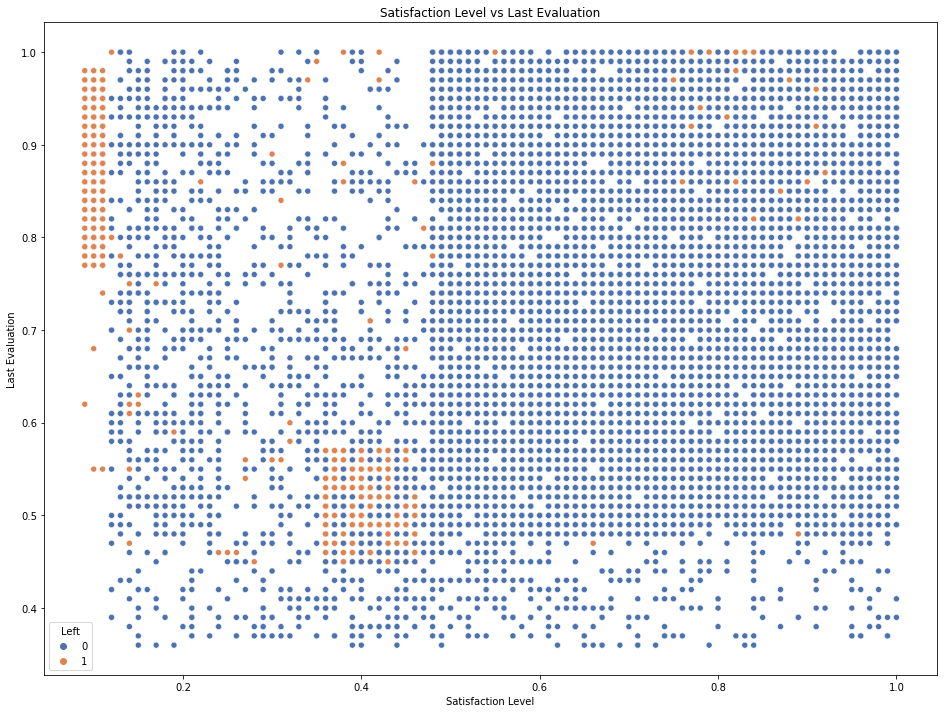

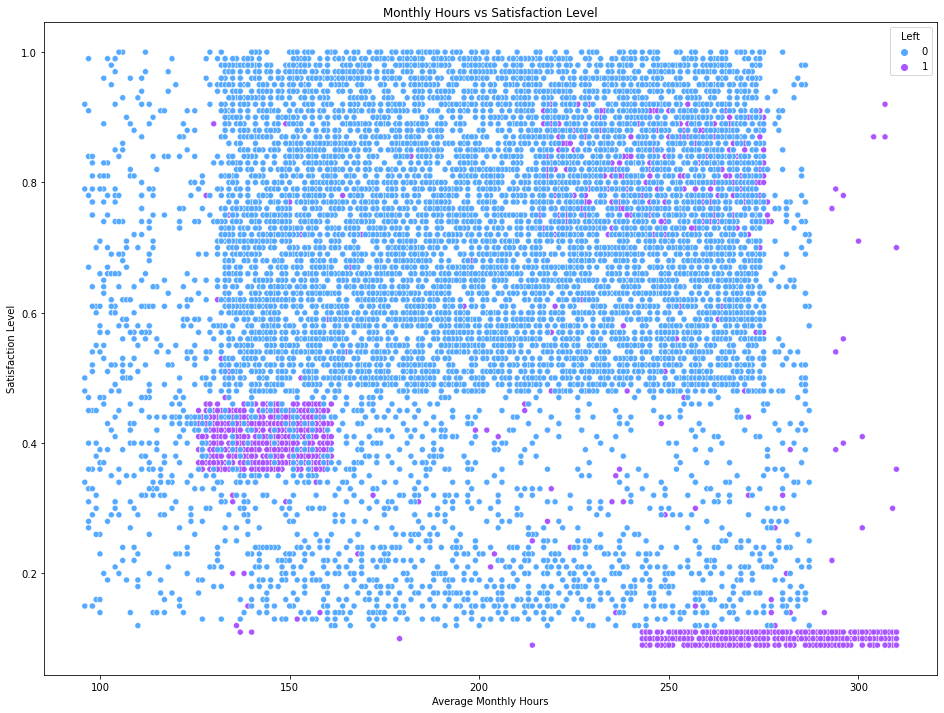

In [ ]:
# Interacion scatterplots
plt.figure(figsize=(16, 12))
sns.scatterplot(x="satisfaction_level", y="last_evaluation", hue="left", data=df, palette="deep")
plt.title("Satisfaction Level vs Last Evaluation")
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.legend(title="Left")
plt.show()

plt.figure(figsize=(16, 12))
sns.scatterplot(x="average_montly_hours", y="satisfaction_level", hue="left", data=df, palette="cool")
plt.title("Monthly Hours vs Satisfaction Level")
plt.xlabel("Average Monthly Hours")
plt.ylabel("Satisfaction Level")
plt.legend(title="Left")
plt.show()

Regarding the relationship between satisfaction level and last evaluation, the plot shows that employees with lower satisfaction levels are predominantly clustered in the lower range of last evaluation scores, indicating that dissatisfaction is correlated with poorer performance evaluations. Conversely, higher satisfaction levels are associated with better evaluation scores, as evidenced by the concentration of blue dots in the upper right quadrant, suggesting that satisfied employees tend to perform better and are more likely to stay with the organization. The presence of orange dots scattered across lower satisfaction levels reinforces the notion that unhappy employees are at a greater risk of leaving.

When it comes to the relationship between monthly hours e satisfaction level, the plot reveals that employees who work fewer hours tend to exhibit higher satisfaction levels, as evidenced by the concentration of blue dots in the upper regions of the satisfaction scale. Conversely, there is a noticeable cluster of purple dots—employees who left—concentrated in the lower satisfaction range, particularly among those who work longer hours. This suggests that increased working hours may contribute to lower job satisfaction, potentially leading to higher turnover rates. The presence of a few purple dots among higher monthly hours indicates that some employees still leave despite working longer hours, indicating that other factors, such as job environment and support, may also significantly impact their decision to depart.

Next, the interactions between the other continuos variables of the dataset will be analyzed.

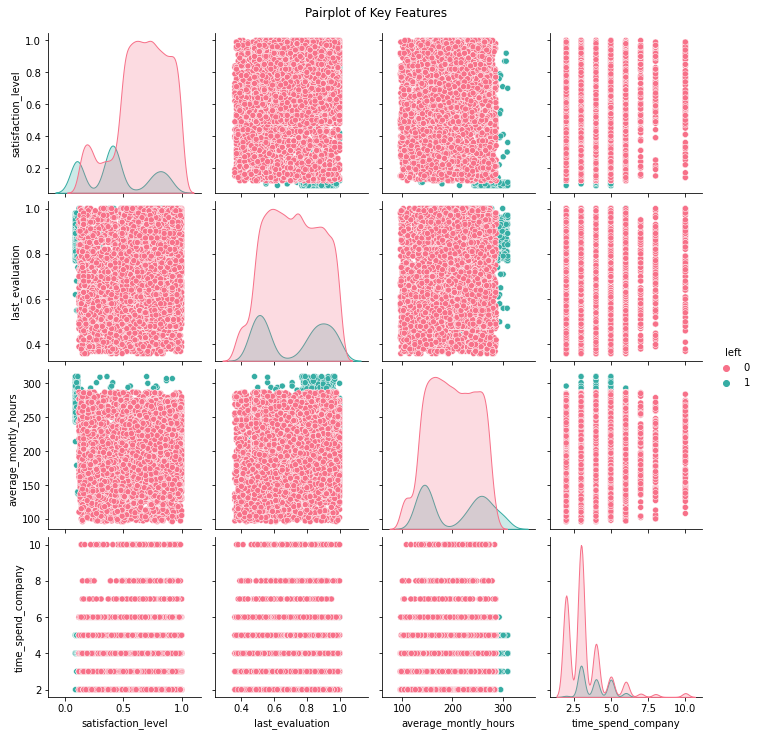

In [ ]:
# Pairplot
sns.pairplot(df, vars=["satisfaction_level", "last_evaluation",
                       "average_montly_hours", "time_spend_company"], hue="left", palette="husl", diag_kind="kde")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

Notably, the plots involving satisfaction level reveal a clear trend: employees with higher satisfaction tend to cluster towards lower turnover, as evidenced by the concentration of pink points in that area. Conversely, lower satisfaction levels correspond with a higher presence of turquoise points, further reinforcing the established link between job satisfaction and attrition.

The last evaluation scores also show a similar pattern, where higher evaluation scores correlate with lower turnover rates. Additionally, examining the relationships between average monthly hours and other variables indicates that employees who work longer hours do not necessarily exhibit higher satisfaction, suggesting a potential risk of burnout.

Next, the time spent in the company will be analyzed by turnover in order to understand how is this pattern.

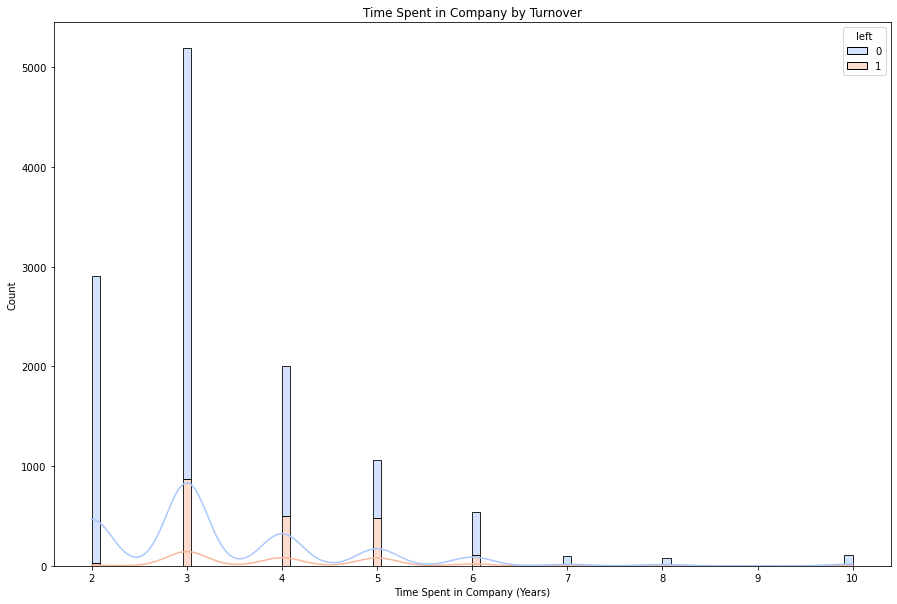

In [ ]:
# time spent in company by turnover bar chart
plt.figure(figsize=(15, 10))
sns.histplot(data=df, x="time_spend_company", hue="left", multiple="stack", palette="coolwarm", kde=True)
plt.title("Time Spent in Company by Turnover")
plt.xlabel("Time Spent in Company (Years)")
plt.ylabel("Count")
plt.show()

As can be seen, there's a clear concentration of employees who left the organization within the lower range of tenure, suggesting that many employees who departed did so relatively early in their careers with the company. In contrast, the distribution for employees who stayed indicates a more gradual decline, with a significant proportion of long-tenured employees remaining with the organization. This pattern suggests that turnover is more pronounced among newer employees, potentially indicating that they may feel less committed or engaged in their roles. The analysis underscores the importance of implementing effective onboarding and engagement strategies for new hires to enhance their experience and increase retention rates, particularly in the early stages of employment.

Next, the satisfaction level by department and turnover will be analyzed.

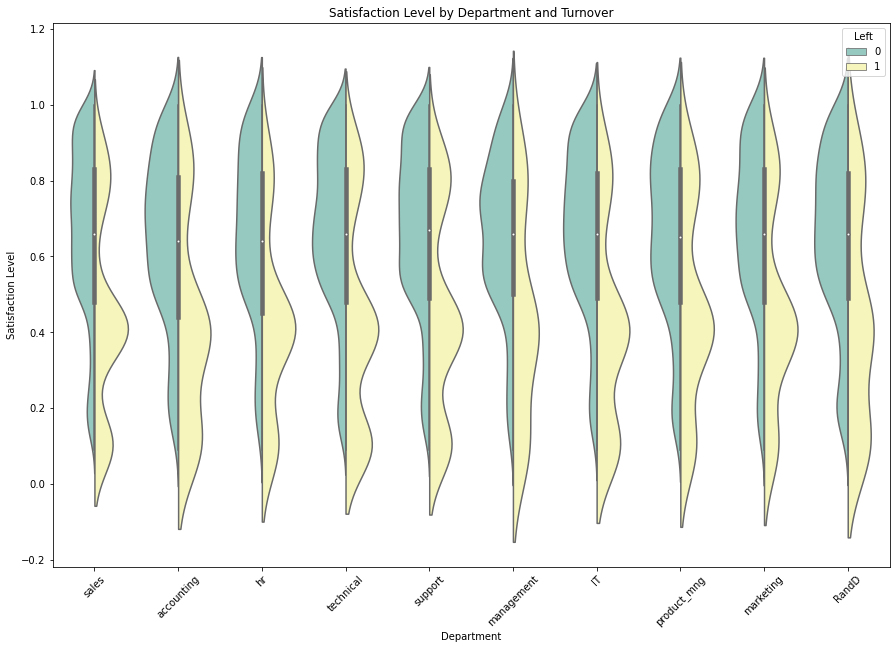

In [ ]:
# violin plot for satisfation by department
plt.figure(figsize=(15, 10))
sns.violinplot(x="department", y="satisfaction_level", hue="left", split=True, data=df, palette="Set3")
plt.title("Satisfaction Level by Department and Turnover")
plt.xticks(rotation=45)
plt.xlabel("Department")
plt.ylabel("Satisfaction Level")
plt.legend(title="Left", loc="upper right")
plt.show()

A clear observation is that departments with higher satisfaction levels seem to correlate with lower turnover rates, as evidenced by the broader green sections, suggesting that satisfied employees are less likely to leave. Conversely, departments exhibiting narrower green areas alongside expanded yellow sections indicate higher turnover, highlighting a potential area of concern for management.

Next, the relationship between the average monthly hours and the number of projects will be analyzed.

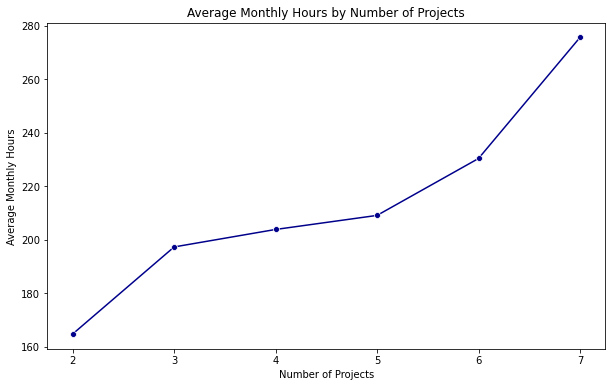

In [ ]:
avg_hours_by_project = df.groupby("number_project")[["average_montly_hours"]].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x="number_project", y="average_montly_hours", data=avg_hours_by_project, marker="o", color="darkblue")
plt.title("Average Monthly Hours by Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Average Monthly Hours")
plt.show()

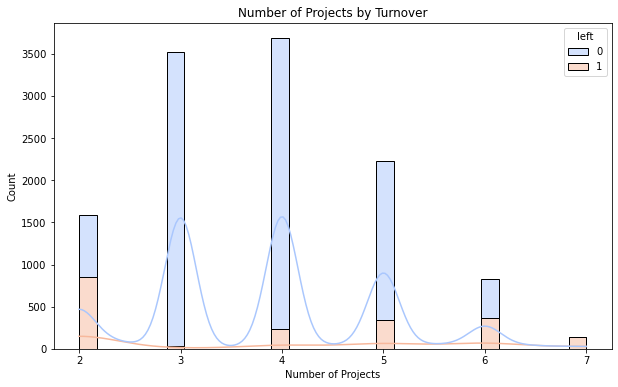

In [ ]:
# number of projects by turnover bar chart
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="number_project", hue="left", multiple="stack", palette="coolwarm", kde=True)
plt.title("Number of Projects by Turnover")
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.show()

It's possible to observe that as the number of projects increases, there is a noticeable upward trend in the average hours, suggesting that employees tend to invest more time when managing a higher workload. This trend may indicate that as project complexity or quantity rises, employees are required to dedicate additional hours to meet the demands of their responsibilities. In addition, the second chart highlights that the more the number of projects, it's more likely that the employee will leave the company. It's also interesting to notice that it's a considerable amount of workers that left with only 2 projects, which may indicates that employers likes to be challenged with more projects, but no so much, with 3 projects as a ideal quantity.

Lastly, the relationship between the promotion in last 5 years and the turnover will be analyzed closely.

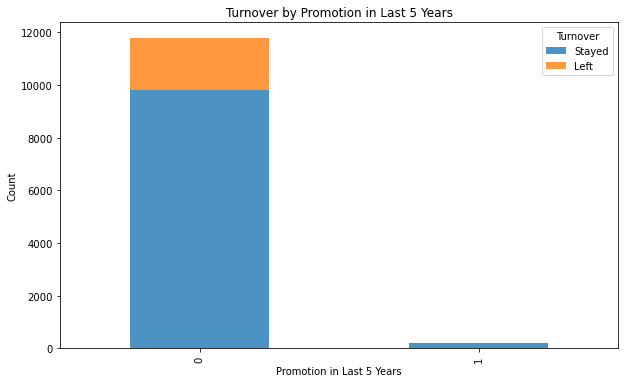

In [ ]:
promotion_data = df.groupby(["promotion_last_5years", "left"]).size().unstack()
promotion_data.plot(kind="bar", stacked=True, figsize=(10, 6), color=["#1f77b4", "#ff7f0e"], alpha=0.8)
plt.title("Turnover by Promotion in Last 5 Years")
plt.xlabel("Promotion in Last 5 Years")
plt.ylabel("Count")
plt.legend(["Stayed", "Left"], title="Turnover")
plt.show()

Notably, the employees who received a promotion in the last 5 years chose to stay in the company, indicating a positive impact of promotions on employee retention. The same happens with those who didn't receive, as the orange segment, representing those who left, is notably smaller in this group, indicating that while some employees do leave without having a promotion, it is not the predominant outcome.

### Hypothesis testing

As noticed in the previous analyses, employees with lower evaluation scores and lower satisfaction levels tend to be more likely to leave. That being said, hypothesis testings will be conducted in order to understand if there is a statistically significant difference in the average evaluation score and satisfaction level between the employees who left and those who stay at the company.

The first hyphotesis test will be regarding the difference in evaluation scores.

In [ ]:
print('Average evaluation score for employees who left the company: ', df[df['left'] == 1]['last_evaluation'].mean())
print('Average evaluation score for employees who stayed at the company: ', df[df['left'] == 0]['last_evaluation'].mean())

Average evaluation score for employees who left the company:  0.7217830236062281
Average evaluation score for employees who stayed at the company:  0.715667


* $H_0$: there's no difference between the evaluation score between employees who left and those who stayed.
* $H_A$: there's a difference between the evaluation score between employees who left and those who stayed.

A 5% significance level was chosen to proceed with the two-sample t-test.

In [ ]:
# Conduct a two-sample t-test to compare means
avg_employees_left = df[df['left'] == 1]['last_evaluation']
avg_employees_stay = df[df['left'] == 0]['last_evaluation']

stats.ttest_ind(a=avg_employees_left, b=avg_employees_stay, equal_var=False)

TtestResult(statistic=1.298040887576492, pvalue=0.1943906982070123, df=2549.55027139441)

The p-value is about 0.20%.

This means there is only a 0.20% probability that the absolute difference between the two average evaluation scores coming from employees who left and who stayed would be 0.006116 greater if the null hypothesis were true. In other words, it's highly unlikely that the difference in evaluation scores coming from employees who left and who stayed is due to chance.

Therefore, as the p-value is less than the significance level of 5%, there is a statistically significant difference between the evaluation score between employees who left and those who stayed.

The next and final hypothesis testing will be regarding the difference in satisfaction level.

In [ ]:
print('Average satisfaction level for employees who left the company: ', df[df['left'] == 1]['satisfaction_level'].mean())
print('Average satisfaction level for employees who stayed at the company: ', df[df['left'] == 0]['satisfaction_level'].mean())

Average satisfaction level for employees who left the company:  0.440271220492215
Average satisfaction level for employees who stayed at the company:  0.667365


* $H_0$: there's no difference between the satisfaction level between employees who left and those who stayed.
* $H_A$: there's a difference between the satisfaction level between employees who left and those who stayed.

A 5% significance level was choosen to proceed with the two-sample t-test.

In [ ]:
# Conduct a two-sample t-test to compare means
avg_employees_left = df[df['left'] == 1]['satisfaction_level']
avg_employees_stay = df[df['left'] == 0]['satisfaction_level']

stats.ttest_ind(a=avg_employees_left, b=avg_employees_stay, equal_var=False)

TtestResult(statistic=-35.88930498486623, pvalue=1.193953844039104e-228, df=2547.316689484498)

The p-value is about 1.19%.

This means there is only a 1.19% probability that the absolute difference between the two average satisfaction levels coming from employees who left and who stayed would be 0.227094 greater if the null hypothesis were true. In other words, it's highly unlikely that the difference in satisfaction levels coming from employees who left and who stayed is due to chance.

Therefore, as the p-value is less than the significance level of 5%, there is a statistically significant difference between the satisfaction between employees who left and those who stayed.

The results of these two hypothesis tests will help in the application of advanced machine learning models further in this project.

### Insights

Given the previous analyses, several insights stand out regarding employee turnover and retention strategies:

* The majority of employees report moderate satisfaction, indicating a potential risk for turnover if their engagement does not improve. The negative correlation between satisfaction and turnover underscores the importance of enhancing job satisfaction to retain employees. Notably, the hypothesis testing revealed a statistically significant difference in satisfaction levels between employees who left and those who stayed, with a p-value of 1.19%. This finding reinforces the critical role of satisfaction in retention efforts.

* Employees with lower evaluation scores tend to be more likely to leave, suggesting that performance feedback is crucial, but alone may not be sufficient to prevent attrition. The hypothesis testing on evaluation scores yielded a p-value of 0.20%, indicating a statistically significant difference between the evaluation scores of employees who left and those who stayed. This highlights the need for a holistic approach to employee development that includes recognition and growth opportunities.

* The analysis indicates that employees working longer hours do not necessarily report higher satisfaction levels, pointing to a potential risk of burnout. Employees who work fewer hours generally show higher satisfaction, suggesting that workload management is essential for retention.

* The sales department exhibits significantly higher turnover compared to others, indicating unique challenges that require targeted interventions. Additionally, employees in lower salary brackets experience higher turnover, suggesting that competitive compensation is vital for retention.

* Newer employees are more likely to leave the organization, highlighting the need for effective onboarding and engagement strategies to foster commitment early in their careers.

* The analysis shows that increased project workloads correlate with longer working hours, which may contribute to higher turnover rates if not managed properly. Conversely, employees who received promotions in the last five years tend to stay, indicating that promotions positively affect retention.

* Positive correlations were noted between satisfaction and evaluation scores, as well as between satisfaction and lower turnover rates, reinforcing that employee satisfaction is a key factor in retention.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task is a classification task.

### Identify the types of models most appropriate for this task.

After conducting the EDA, it can be concluded that the most appropriate models for this task are the tree-based models (decision-tree, random forest, and XGBoost) because they are well-suited for handling the complexity and non-linearity in the relationships among the variables, provide robust performance in classification tasks, and can effectively manage both categorical and numerical data without extensive preprocessing. Additionally, their ability to capture interactions between features makes them particularly effective for predicting employee turnover.



### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


First, based on the EDA findings, some new features will be extracted, such as the average hours per project and whether the employee is a newer employee or not (<= 2 years of company).

In [ ]:
df['avg_hours_per_project'] = df['average_montly_hours'] / df['number_project']
df['is_newer'] = (df['time_spend_company'] <= 2).astype(int)

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,avg_hours_per_project,is_newer
0,0.38,0.53,2,157,3,0,1,0,sales,low,78.500000,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,52.400000,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,38.857143,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,44.600000,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,79.500000,0


Next, the categorial variables (department and salary) will be encoded.

In [ ]:
# Create a copy of the X data
X = df.copy()

# Dummy encode remaining categorical values
X = pd.get_dummies(X, columns = ['department', 'salary'], drop_first=True)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,avg_hours_per_project,is_newer,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,78.500000,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,52.400000,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,38.857143,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,44.600000,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,79.500000,0,False,False,False,False,False,False,True,False,False,True,False


With all variables as numeric, now it's time to split the data and create the train/validate/test sets.

#### Spliting the data

In [ ]:
# Isolate target variable
y = X['left']

In [ ]:
# Isolate features
X = X.drop(['left'], axis=1)

X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,avg_hours_per_project,is_newer,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,78.500000,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,0,52.400000,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,0,38.857143,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,0,44.600000,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,0,79.500000,0,False,False,False,False,False,False,True,False,False,True,False


#### Creating train/test/validade sets

In [ ]:
# Split the data into training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

In [ ]:
# Get shape of each training, validation, and testing set
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((7194, 20), (2398, 20), (2399, 20), (7194,), (2398,), (2399,))

With the data prepared and divided into train/test/validate sets, it's time to build the models. In this case, a high recall is particularly important as the goal is to minimize the risk of missing employees likely to leave, as it ensures that most of those at risk are flagged for intervention.

#### Decision Tree

In [ ]:
# Instantiate the XGBoost classifier
decision_tree = DecisionTreeClassifier(random_state = 42)

# Create a dictionary of hyperparameters to tune
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
clf = GridSearchCV(decision_tree,
                  tree_para,
                  scoring = scoring,
                  cv = 5,
                  refit = 'recall')

In [ ]:
%%time
clf.fit(X_train, y_train)

CPU times: user 53.6 s, sys: 127 ms, total: 53.8 s
Wall time: 55.2 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=42)

In [ ]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9172


In [ ]:
results = pd.DataFrame(columns=[])

def make_results(model_name, model_object):

    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

In [ ]:
result_table = make_results("Tuned Decision Tree", clf)
result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.942078,0.913934,0.972193,0.980956


The model achieved an impressive recall of 0.9139, showcasing the power of the decision tree at predicting employees who left the company. It's also notable the incredible precision of 0.9721, which means that the model is also good at predicting those who are likely to not leave the company. The F1-score of 0.9420 presents a good balance between precision and recall, highlighting the good predictive power of the model in general.

Next, the decision tree will be plotted to pinpoint where the splits in the data are occurring.

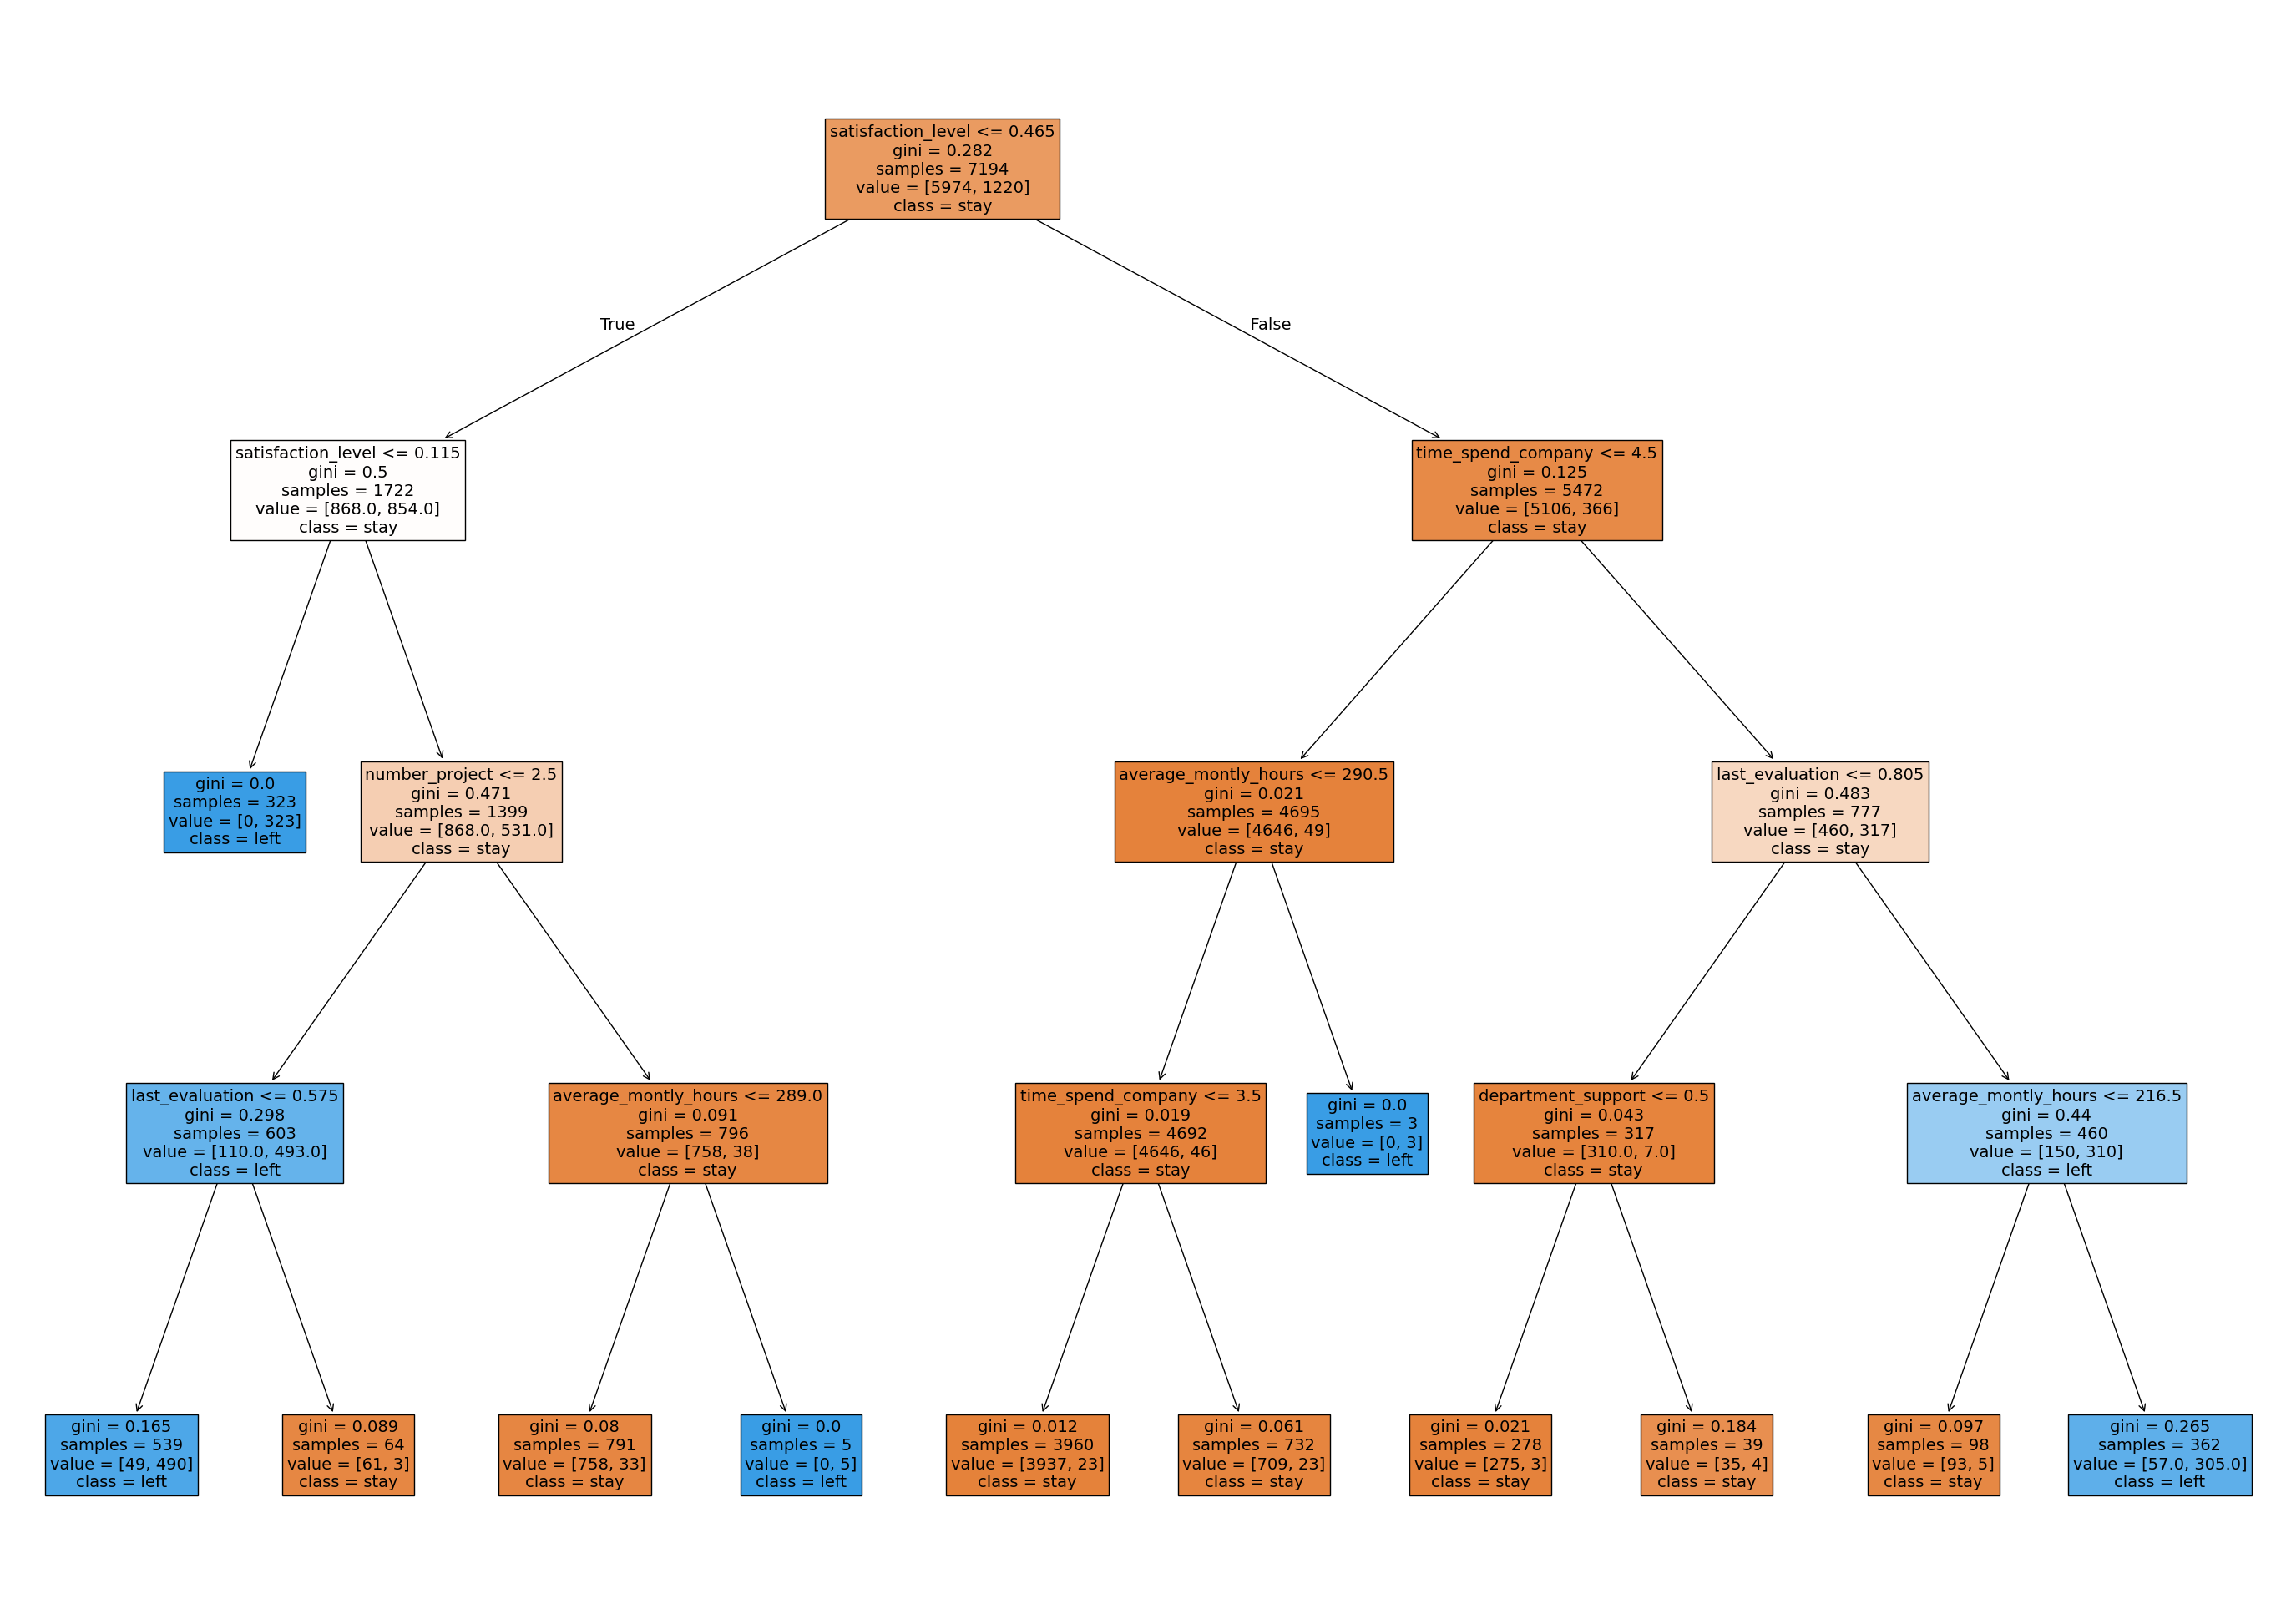

In [ ]:
plt.figure(figsize=(35,25))
plot_tree(clf.best_estimator_, max_depth = 5, fontsize=14, feature_names = X.columns,
         class_names = {0: 'stay', 1: 'left'}, filled=True)

plt.show()

A primary determinant is the satisfaction level; employees with a satisfaction score below 0.465 are significantly more likely to leave. This suggests that dissatisfaction is a major driver of turnover, emphasizing the need for management to prioritize employee satisfaction.

Furthermore, the analysis shows that employees involved in fewer than 2.5 projects and working less than 290.5 average monthly hours are also predisposed to leaving. This could indicate that employees with lower workloads may feel less engaged or valued, prompting them to seek opportunities elsewhere. Additionally, those who have been with the company for less than 4.5 years are more likely to leave, particularly if their last evaluation score is below 0.805. This suggests that newer employees may feel less committed or supported, especially if their performance feedback is not favorable.

#### Random Forest

In [ ]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {
    'n_estimators': [50, 100],
    'max_depth': [5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None],
    'bootstrap': [True],
    'random_state': [42],
    'criterion': ['gini'],
    'class_weight': [None]
}

# Define a dictionary of scoring metrics to capture
scoring=['precision','f1','recall','accuracy']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [ ]:
%%time
# Examine best recall score
rf_cv.fit(X_train, y_train)

CPU times: user 1min 48s, sys: 275 ms, total: 1min 48s
Wall time: 1min 49s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True], 'class_weight': [None],
                         'criterion': ['gini'], 'max_depth': [5, 7],
                         'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [50, 100],
                         'random_state': [42]},
             refit='recall', scoring=['precision', 'f1', 'recall', 'accuracy'])

In [ ]:
print("Best Avg. Validation Score: ", "%.4f" % rf_cv.best_score_)

Best Avg. Validation Score:  0.9180


In [ ]:
# Examine best parameters
rf_cv.best_params_

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 42}

In [ ]:
result_table_rf = make_results("Tuned Random Forest", rf_cv)
result_table_rf

,Model,F1,Recall,Precision,Accuracy
0,Tuned Random Forest,0.947095,0.918033,0.978372,0.982624


As can be seen, the model also achieved an impressive recall of 0.9180, showcasing the power of the decision tree at predicting employees who left the company, and being slightly better than the decision tree. It's also notable that the random forest had a better precision (0.9470), which means that the model is also good at predicting those who are likely to not leave the company. The result of the F1-score also underscores the decision tree, with a value of 0.9470.

#### XGBoost

In [ ]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state = 0)

# Create a dictionary of hyperparameters to tune
cv_params = {
    'max_depth': [4, 8, 12],
    'min_child_weight': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [200, 300]
}

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [ ]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 1min 26s, sys: 1.13 s, total: 1min 27s
Wall time: 52.4 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [200, 300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
xgb_cv.best_score_

0.9163934426229507

In [ ]:
xgb_cv.best_params_


{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 200}

In [ ]:
result_table_xgb = make_results("Tuned XGBoost", xgb_cv)
result_table_xgb

,Model,F1,Recall,Precision,Accuracy
0,Tuned XGBoost,0.945418,0.909836,0.984171,0.982207


Although the model also achieved an impressive recall of 0.9098, it underperforms when compared to the decision tree and the random forest. However, it has the best precision amongst the tree models evaluated (0.9841). The XGBoost would be a good choice if the class of employees that chose to stay in the company was the target class.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



With the three models built and tested, now it's time to evaluate them.

### Evaluating the Decision Tree

In [ ]:
#Evaluate Decision tree model
y_pred = clf.best_estimator_.predict(X_val)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

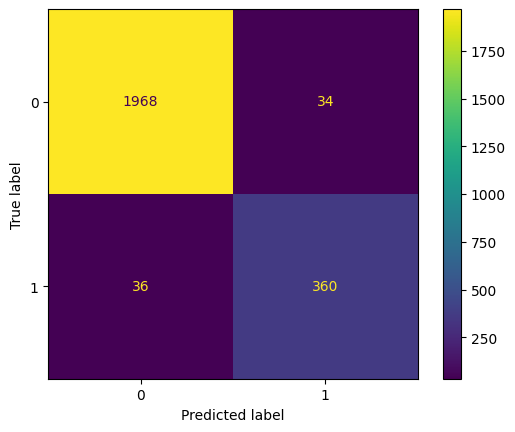

In [ ]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()


In [ ]:
# Create a classification report
target_labels = ['stay', 'left']
print(classification_report(y_val, y_pred, target_names=target_labels, digits=4))
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

              precision    recall  f1-score   support

        stay     0.9820    0.9830    0.9825      2002
        left     0.9137    0.9091    0.9114       396

    accuracy                         0.9708      2398
   macro avg     0.9479    0.9461    0.9470      2398
weighted avg     0.9708    0.9708    0.9708      2398

AUC: 0.9461



The decision tree has a good performance at the validation set, with a recall of 0.9091, a precision of 0.9137, an AUC of 0.9461, and a f1-score of 0.9114, showcasing the good predictive power of the model on whether the employee will leave the company of not.

In [ ]:
from sklearn.metrics import roc_curve, auc

#### ROC Curve
The ROC curve shows how well a model separates classes by plotting true positive rate vs. false positive rate at different thresholds. It’s useful for understanding a model’s trade-off between sensitivity and false alarms. The area under the curve (AUC) summarizes this, with higher values meaning better performance.

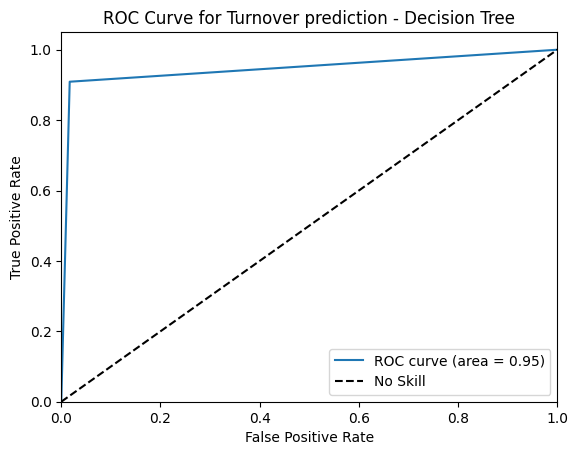

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Turnover prediction - Decision Tree')
plt.legend()
plt.show()

As it can be seen, the decision tree model's TP/FP rate is very close to the top-left corner of the plot, which suggests reasonable predictive power of the model at classifying whether an employee will leave the company or not.

### Evaluating the Random Forest

In [ ]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
y_pred = rf_cv.best_estimator_.predict(X_val)

In [ ]:
# Display the predictions on the encoded testing set
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Display the true labels of the testing set
y_val

,left
6266,0
2824,0
5812,0
6237,0
3406,0
...,...
8715,0
1612,1
10521,0
8397,0


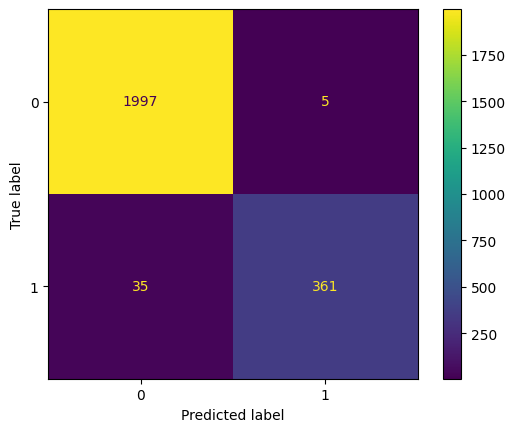

In [ ]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [ ]:
# Create a classification report
target_labels = ['stay', 'left']
print(classification_report(y_val, y_pred, target_names=target_labels, digits=4))
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

              precision    recall  f1-score   support

        stay     0.9828    0.9975    0.9901      2002
        left     0.9863    0.9116    0.9475       396

    accuracy                         0.9833      2398
   macro avg     0.9846    0.9546    0.9688      2398
weighted avg     0.9834    0.9833    0.9831      2398

AUC: 0.9546



The random forest reaches an excelent performance at the validation set, outperforming the decision tree in all the validation metrics, with a recall of 0.9116, a precision of 0.9863, an AUC of 0.9545, and a f1-score of 0.9475, also showcasing the outstanding predictive power of the model on whether the employee will leave the company of not.

#### ROC Curve

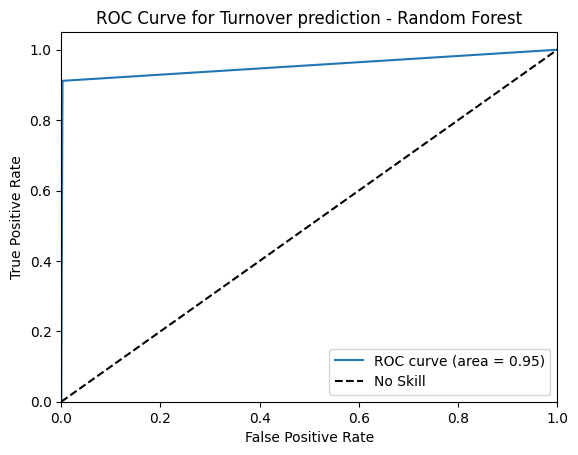

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Turnover prediction - Random Forest')
plt.legend()
plt.show()

Notably, the random forest model's TP/FP rate is reasonably close to the top-left corner of the plot, which suggests reasonable predictive power of the model at classifying whether an employee will leave the company or not.

### Evaluating the XGBoost

In [ ]:
#Evaluate XGBoost model
y_pred = xgb_cv.best_estimator_.predict(X_val)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

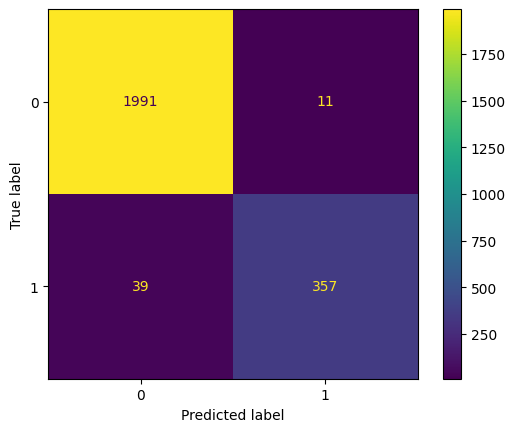

In [ ]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [ ]:
# Create a classification report
target_labels = ['stay', 'left']
print(classification_report(y_val, y_pred, target_names=target_labels, digits=4))
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

              precision    recall  f1-score   support

        stay     0.9808    0.9945    0.9876      2002
        left     0.9701    0.9015    0.9346       396

    accuracy                         0.9791      2398
   macro avg     0.9754    0.9480    0.9611      2398
weighted avg     0.9790    0.9791    0.9788      2398

AUC: 0.9480



The XGBoost also presents good performance in all the four main evaluation metrics, but it underperforms when compared to the decision tree and the random forest models.

#### ROC Curve

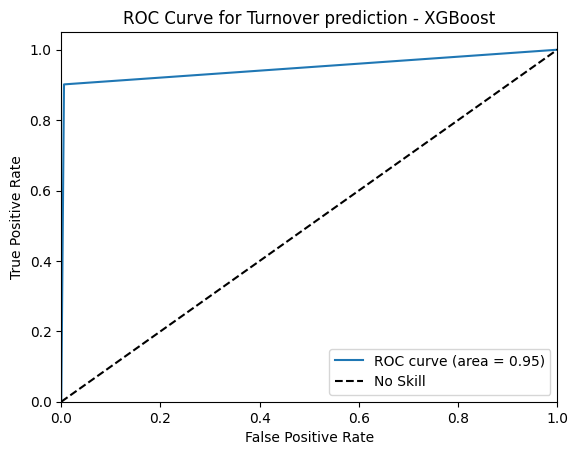

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Turnover prediction - XGBoost')
plt.legend()
plt.show()

As can be observed, the XGBoost model's TP/FP rate is also very close to the top-left corner of the plot, showcasing the good predictive power of the model at classifying whether an employee will leave the company or not.



### The best model

 The random forest has the best recall among the three models, and also a incredible f1-score for both cases: if the employee will leave of stay at the company, presenting a good balance between precision and recall. Therefore, the random forest is the champion model.

In [ ]:
### YOUR CODE HERE ###
y_pred = rf_cv.best_estimator_.predict(X_test)

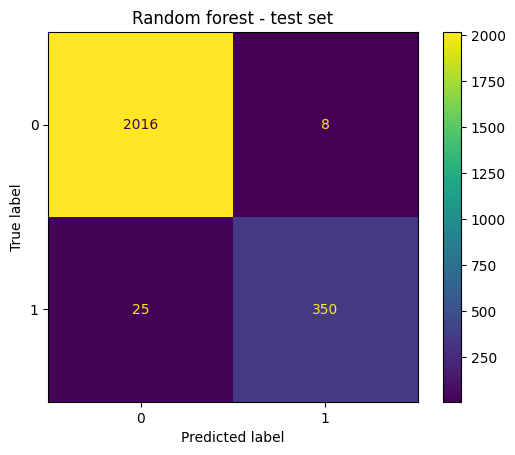

In [ ]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('Random forest - test set');
plt.show()

In [ ]:
# Create a classification report
target_labels = ['stay', 'left']
print(classification_report(y_test, y_pred, target_names=target_labels, digits=4))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

        stay     0.9878    0.9960    0.9919      2024
        left     0.9777    0.9333    0.9550       375

    accuracy                         0.9862      2399
   macro avg     0.9827    0.9647    0.9734      2399
weighted avg     0.9862    0.9862    0.9861      2399

AUC: 0.9647



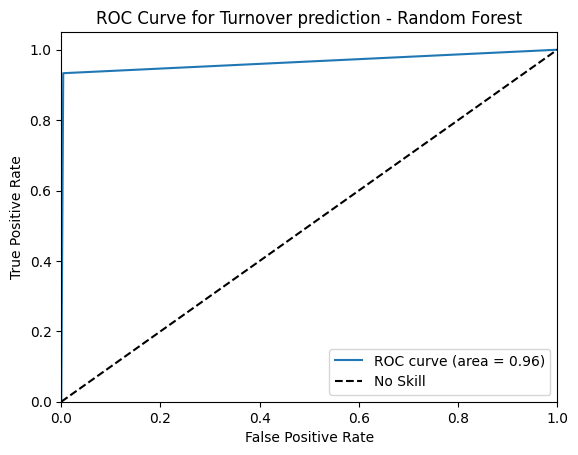

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Turnover prediction - Random Forest')
plt.legend()
plt.show()

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

When applied to the test set, the model achieved a precision of 0.9878 for correctly identifying employees who stayed and 0.9777 for those who left, showcasing high accuracy in classifying both groups. The recall scores further emphasize this effectiveness, with 0.9960 for employees who stayed and 0.9333 for those who left, indicating that the model is particularly adept at capturing employees who remain with the company. The F1-scores of 0.9919 for "stay" and 0.9550 for "left" reflect a strong balance between precision and recall, highlighting the model's reliability in predicting turnover. Overall, with an accuracy of 0.9862, the model exhibits exceptional performance across the dataset.

Additionally, the ROC curve reinforces its strong predictive capabilities, achieving an AUC of 0.9647. This indicates an excellent ability to distinguish between employees who are likely to leave and those who will stay. The curve illustrates that the model maintains a high true positive rate while keeping the false positive rate low, underscoring its effective classification ability. This robust performance suggests that the Random Forest model is well-suited for turnover prediction, providing valuable insights that can inform strategies for improving employee retention and reducing attrition within Salifort Motors.

Next, the most important features will be analyzed.

In [ ]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns).sort_values(ascending=False)

rf_importances

rf_importances_df = rf_importances.reset_index()

rf_importances_df.columns = ['feature', 'score']

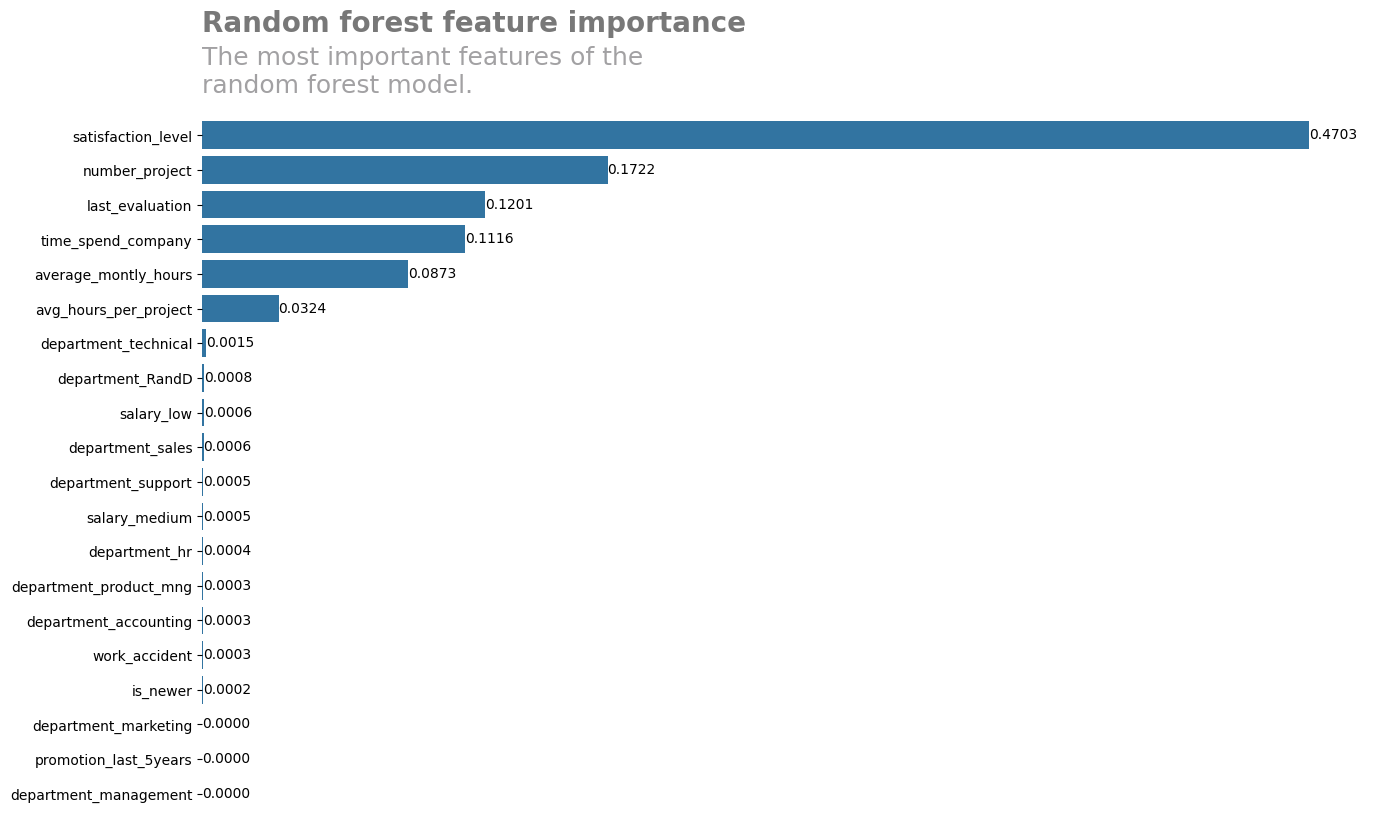

In [ ]:
# defining some colors
GREY1, GREY2, GREY3= "#CFCDCE", "#A2A1A3", "#787878"

# plotting the bar chart
fig, ax = plt.subplots(figsize= (15,9))
n_plots = 21
palette = sns.color_palette("Blues_d", n_colors=n_plots)
palette.reverse()
with palette:
  ax = sns.barplot(y='feature' ,x='score', data=rf_importances_df)
  # plotar título
  plt.text(0, -3, 'Random forest feature importance',
          fontsize=20,
          color=GREY3,
          weight='bold')

  # plotar subtitulo
  plt.text(0, -2.6,
          "The most important features of the \n"
          "random forest model.",
          verticalalignment="top",
          fontsize=18,
          color=GREY2)

  initialx=0

  #remover grid
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  #remover titulos
  ax.set_ylabel('')
  ax.set_xlabel('')

  plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)

  #adicionar labels
  for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,'{:.4f}'.format(p.get_width()))
    initialx+=1
  plt.show()

The most significant predictor is satisfaction level, which accounts for 47.03% of the importance score. This highlights that employee satisfaction is critical in determining whether individuals choose to stay with the organization. Following this, the number of projects has an importance score of 17.22%, indicating that the extent of an employee's workload is a vital factor in their retention decisions.

The third most important feature is last evaluation, contributing 12.01% to the model. This suggests that performance assessments significantly impact employees' commitment to the organization. Additionally, time spent at the company plays a notable role with an importance score of 11.16%, reflecting how tenure can influence loyalty and engagement levels. The feature average monthly hours is also relevant, with an importance score of 8.73%, indicating that the amount of work employees do is associated with their likelihood to stay or leave. Lastly, the average of hours per project holds an importance score of 3.24%, suggesting that how hours are distributed across projects can affect employee satisfaction and turnover risk. Conversely, variables like work accident, promotion in the last five years, and various departmental indicators show minimal impact on turnover predictions.

### Conclusion, Recommendations, Next Steps

**Conclusion**

The analysis of employee turnover through exploratory data analysis and modeling has highlighted the effectiveness of the Random Forest model, which outperformed both the Decision Tree and XGBoost models. Key factors influencing retention were identified, with satisfaction level being the most significant predictor, followed by the number of projects, last evaluation scores, time spent at the company, average monthly hours, and hours per project. The Random Forest model demonstrated high accuracy, precision, and recall, making it a robust tool for identifying employees at risk of leaving.

**Recommendations**

To enhance employee retention, it is essential for management to prioritize initiatives aimed at improving job satisfaction, as it is the strongest predictor of turnover. Implementing regular feedback mechanisms can help address performance concerns, while effectively managing workloads will prevent employee burnout. Additionally, fostering a supportive work environment and providing opportunities for career development will significantly enhance commitment, particularly among newer employees.

**Next Steps**

Moving forward, it is recommended to apply the Random Forest model in day-to-day operations to proactively identify employees at risk of turnover. This model can be integrated into HR processes, allowing for timely interventions based on predictive insights. Continuous monitoring of turnover trends and the effectiveness of retention strategies will be essential. Furthermore, conducting targeted employee engagement surveys and analyzing exit interviews can provide deeper insights into satisfaction drivers. Ultimately, these efforts will create a more supportive workplace environment, reducing turnover and enhancing overall organizational performance.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.